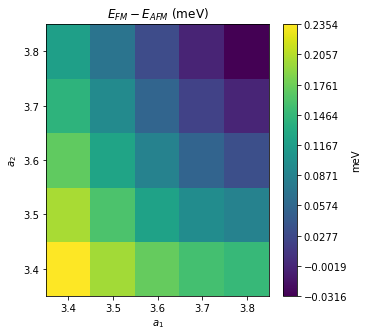

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import matplotlib as mpl
from math import sqrt
from matplotlib.colors import LinearSegmentedColormap
a1 = [3.4,3.5,3.6,3.7,3.8]
a2 = a1
E_FM = np.array(['-.47865193E+02', '-.48172287E+02', '-.48380734E+02', '-.48504157E+02', '-.48541629E+02', '-.48172287E+02', '-.48432392E+02', '-.48610741E+02', '-.48698256E+02', '-.48706680E+02', '-.48380734E+02', '-.48610741E+02', '-.48749665E+02', '-.48814019E+02', '-.48796692E+02', '-.48504158E+02', '-.48698256E+02', '-.48814020E+02', '-.48848915E+02', '-.48810124E+02', '-.48541631E+02', '-.48706680E+02', '-.48796692E+02', '-.48810126E+02', '-.48751251E+02']).astype(float)/3
E_zigzag = np.array(['-.12952382E+03', '-.13004815E+03', '-.13039167E+03', '-.13058966E+03', '-.13062430E+03', '-.13006407E+03', '-.13042927E+03', '-.13060478E+03', '-.13064313E+03', '-.13056812E+03', '-.13037332E+03', '-.13062567E+03', '-.13069461E+03', '-.13060114E+03', '-.13038192E+03', '-.13047420E+03', '-.13062605E+03', '-.13060726E+03', '-.13043519E+03', '-.13012691E+03', '-.13038764E+03', '-.13045514E+03', '-.13036041E+03', '-.13011812E+03', '-.12975042E+03']).astype(float)/8
E_FM = E_FM.reshape(5,5)
E_zigzag = E_zigzag.reshape(5,5)
E_diff = E_FM - E_zigzag
#E_diff = E_diff*(10**3)
plt.pcolor(a1,a2,E_diff,shading = 'auto');
#plt.colorbar(ticks=[E_diff.min(), 0, 0.001, E_diff.max()]);
plt.colorbar(ticks=np.linspace(start = E_diff.min(), stop = E_diff.max(), num = 10),label = 'meV');
plt.title(r'$E_{FM} - E_{AFM}$ (meV)')
plt.xlabel(r'$a_{1}$');
plt.ylabel(r'$a_{2}$');

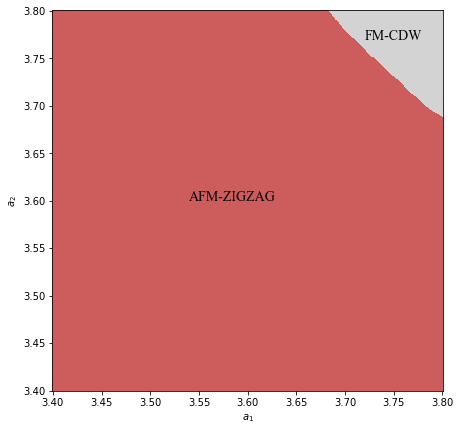

In [46]:
from scipy import interpolate
f = interpolate.interp2d(a1, a1, E_diff, kind='linear')
xnew = np.arange(3.4, 3.8+1e-3, 1e-3)
znew = f(xnew,xnew)
znew[znew < 0] = 0
znew[znew > 0] = 1
cmap = LinearSegmentedColormap.from_list('mycmap', ['lightgray', 'indianred'])
plt.pcolor(xnew,xnew,znew, vmin=znew.min(), vmax=znew.max(),shading = 'nearest',cmap=cmap)
#plt.colorbar(ticks=np.linspace(znew.min(), znew.max(), num = 12));
plt.rcParams["figure.figsize"] = (7,7)
plt.xlabel(r'$a_{1}$');
plt.ylabel(r'$a_{2}$');

plt.text(3.54, 3.6, r'AFM-ZIGZAG', fontsize = 14, fontfamily = "Times New Roman");
plt.text(3.72, 3.77, r'FM-CDW',fontsize = 14, fontfamily = "Times New Roman");
plt.savefig('AFM-FM.png', transparent=False)